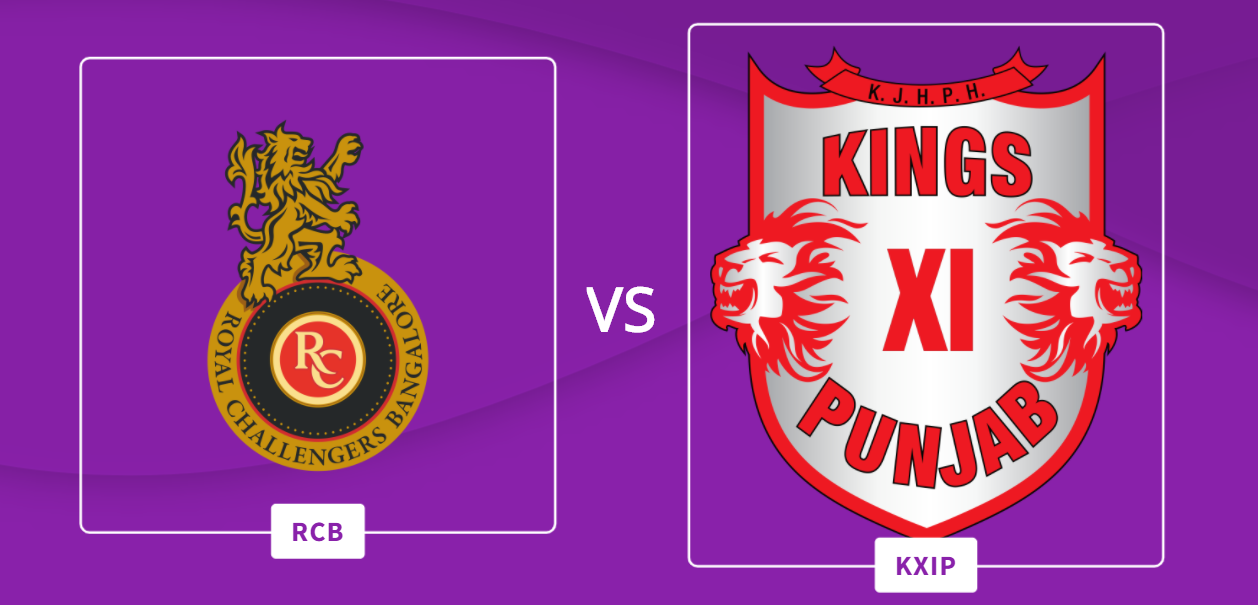

In [241]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

# load the Data

In [242]:
matches = pd.read_csv("matches.csv")
deliveries =  pd.read_csv("deliveries.csv")

###############################################################################################################################
# Prediction of AB de Villiers and Virat Kohli Partnership  Run Score
###############################################################################################################################

In [450]:
kohli_AbD_data = deliveries[((deliveries.batsman == 'AB de Villiers') & (deliveries.non_striker == 'V Kohli') | (deliveries.non_striker == 'AB de Villiers') & (deliveries.batsman == 'V Kohli'))]

kohli_AbD = deliveries[((deliveries.batsman == 'AB de Villiers') & (deliveries.non_striker == 'V Kohli') | (deliveries.non_striker == 'AB de Villiers') & (deliveries.batsman == 'V Kohli'))]

#kohli_AbD[kohli_AbD.match_id == 11345]


In [451]:
partnership_runs = kohli_AbD.groupby(['match_id','batsman', 'non_striker'])['batsman_runs', 'total_runs'].sum().reset_index()

ball_faced = kohli_AbD.groupby(['match_id','batsman', 'non_striker']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='balls_faced')
ball_faced

batsmen_performance = pd.merge(partnership_runs,ball_faced,how='inner',left_on=['match_id','batsman', 'non_striker'],right_on=['match_id','batsman','non_striker'])


In [452]:
batsmen_performance['strike_rate_for_partnership']=batsmen_performance['batsman_runs']*100/batsmen_performance['balls_faced']
#batsmen_performance[batsmen_performance.match_id == 11345]


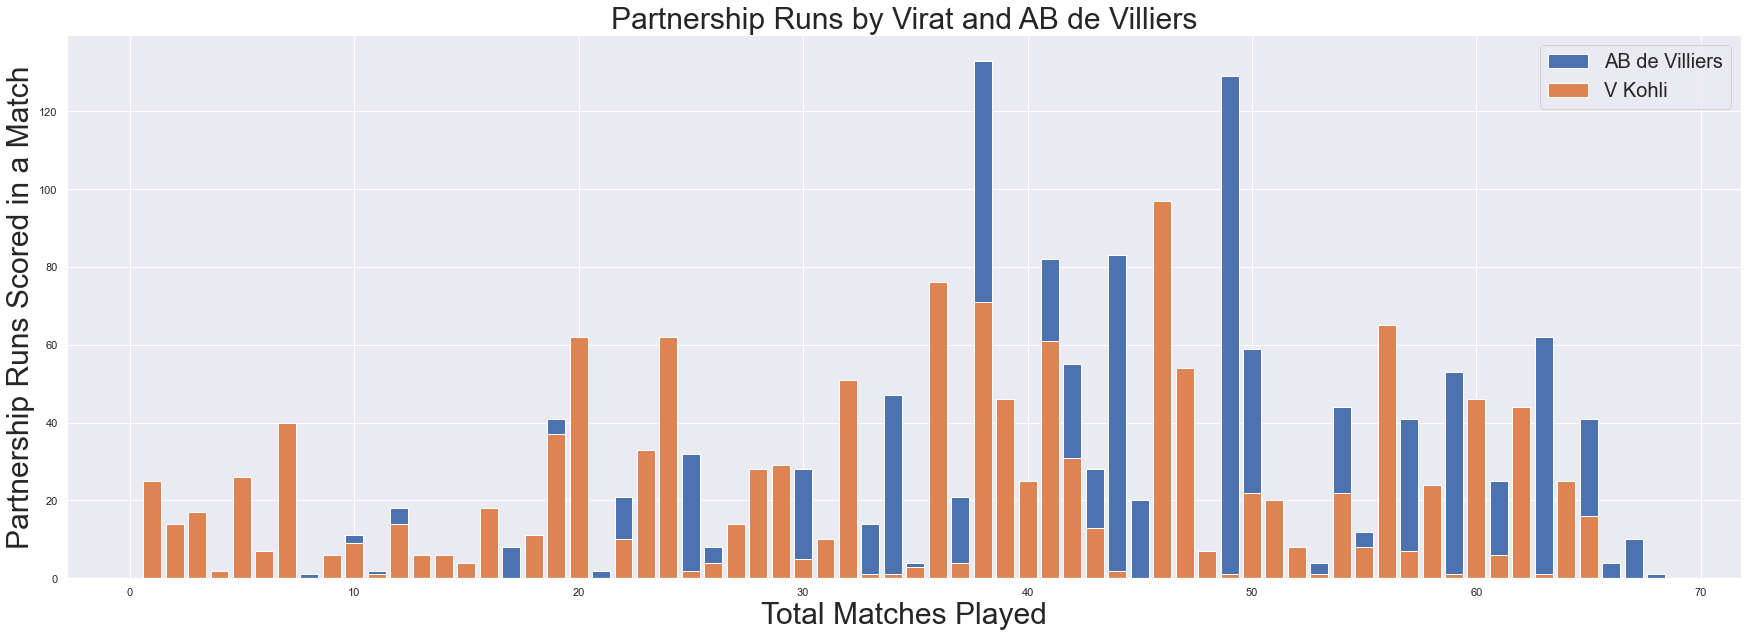

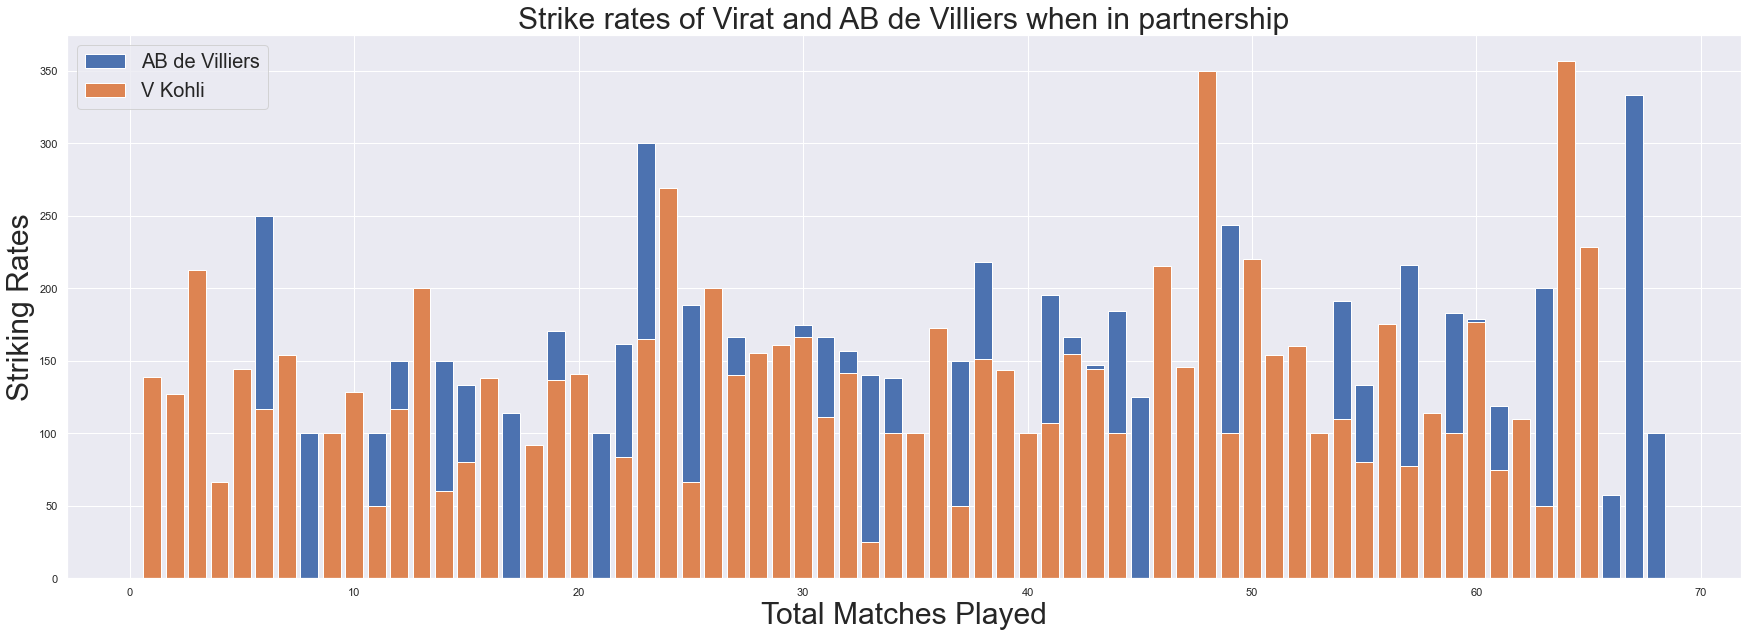

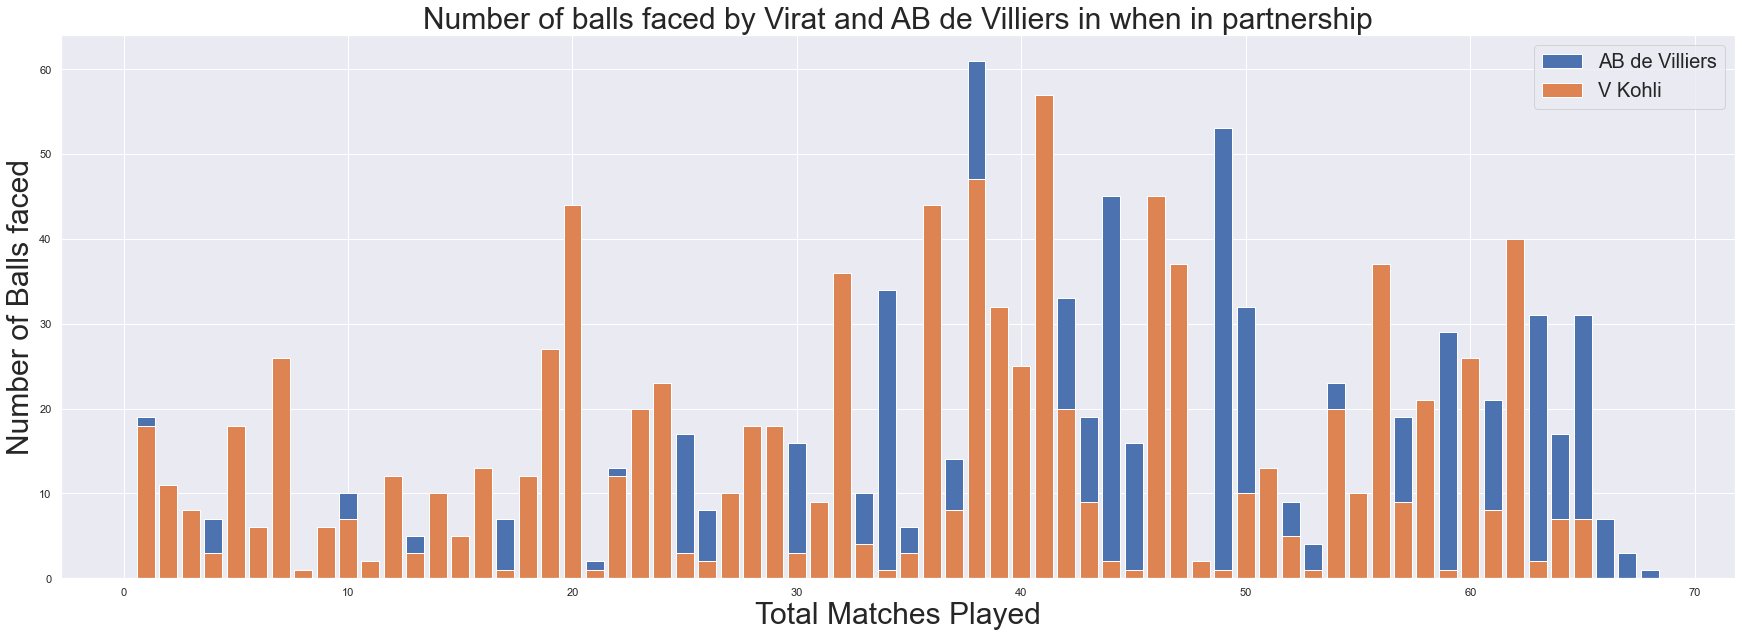

In [453]:
plt.figure(figsize=(30,10))
for name in batsmen_performance.batsman.unique():
    batsman_check=batsmen_performance[batsmen_performance.batsman==name]
    batsman_check.index = np.arange(1, len(batsman_check) + 1)
    x=batsman_check.index
    y=batsman_check.batsman_runs
    plt.bar(x,y)
plt.legend(batsmen_performance.batsman.unique(),prop={'size':20})
plt.title("Partnership Runs by Virat and AB de Villiers",fontsize= 30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Partnership Runs Scored in a Match",fontsize=30)
plt.show()

plt.figure(figsize=(30,10))
for name in batsmen_performance.batsman.unique():
    batsman_check1=batsmen_performance[batsmen_performance.batsman==name]
    batsman_check1.index = np.arange(1, len(batsman_check1) + 1)
    x=batsman_check1.index
    y=batsman_check1.strike_rate_for_partnership
    plt.bar(x,y)
plt.legend(batsmen_performance.batsman.unique(),prop={'size':20})
plt.title("Strike rates of Virat and AB de Villiers when in partnership",fontsize= 30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Striking Rates",fontsize=30)
plt.show()

plt.figure(figsize=(30,10))
for name in batsmen_performance.batsman.unique():
    batsman_check2=batsmen_performance[batsmen_performance.batsman==name]
    batsman_check2.index = np.arange(1, len(batsman_check2) + 1)
    x=batsman_check2.index
    y=batsman_check2.balls_faced
    plt.bar(x,y)
plt.legend(batsmen_performance.batsman.unique(),prop={'size':20})
plt.title("Number of balls faced by Virat and AB de Villiers in when in partnership",fontsize= 30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Number of Balls faced",fontsize=30)
plt.show()

In [454]:
VK = batsmen_performance[batsmen_performance.batsman == "V Kohli"]
ABD = batsmen_performance[batsmen_performance.batsman == "AB de Villiers"]

print("Virat Kohli's performance stats during partnership\n\nAverage number of balls faced: ",VK.balls_faced.mean(),
     "\nMaximum number of Balls faced are :",VK.balls_faced.max(),"\nAverage Total runs scored: ",VK.total_runs.mean(),"\nMaximum Run Score: ",
      VK.batsman_runs.max(),"\nAverage Strike Rate: ",((VK.total_runs.sum()*100)/VK.balls_faced.sum()))

print("#########################################################################################################")

print("AB de Villiers' performance stats during partnership\n\nAverage number of balls faced: ",ABD.balls_faced.mean(),
     "\nMaximum number of Balls faced are :",ABD.balls_faced.max(),"\nAverage Total runs scored: ",ABD.total_runs.mean(),"\nMaximum Run Score: ",
      ABD.batsman_runs.max(),"\nAverage Strike Rate: ",((ABD.total_runs.sum()*100)/ABD.balls_faced.sum()))


Virat Kohli's performance stats during partnership

Average number of balls faced:  14.507692307692308 
Maximum number of Balls faced are : 57 
Average Total runs scored:  21.476923076923075 
Maximum Run Score:  97 
Average Strike Rate:  148.03817603393426
#########################################################################################################
AB de Villiers' performance stats during partnership

Average number of balls faced:  13.514705882352942 
Maximum number of Balls faced are : 61 
Average Total runs scored:  21.529411764705884 
Maximum Run Score:  133 
Average Strike Rate:  159.30359085963002


In [455]:
# Hence, Average Runs scored by both would be
print("Probable Score of Virat Kohli and AB de Villiers partnership: ",((((ABD.total_runs.sum()*100)/ABD.balls_faced.sum()) * ABD.balls_faced.mean())/100) + ((((VK.total_runs.sum()*100)/ABD.balls_faced.sum()) * VK.balls_faced.mean())/100))

Probable Score of Virat Kohli and AB de Villiers partnership:  43.56721204929616


## Probable Score of Virat Kohli and AB de Villiers partnership:  43.56721204929616 ~ 44

Let's run a Linear Regression on matchwise balls faced and total runs scored by their Partnership

## Linear Regression

In [456]:
p_runs = kohli_AbD.groupby(['match_id'])['batsman_runs'].sum().reset_index(name = "partnership_runs")

ball_faced_ = kohli_AbD.groupby(['match_id']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='balls_faced')

batsmen_performance_ = pd.merge(p_runs,ball_faced_,how='inner',left_on=['match_id'],right_on=['match_id'])
batsmen_performance_[batsmen_performance_.match_id == 11345]
linear_test = batsmen_performance_[['match_id', 'balls_faced','partnership_runs']]
linear_test.head()

,match_id,balls_faced,partnership_runs
0,12,37,43
1,17,22,27
2,33,16,20
3,245,10,2
4,248,36,42


In [457]:
linear_test["match_id"]= linear_test["match_id"].astype(str)

In [458]:
linear_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          68 non-null     object
 1   balls_faced       68 non-null     int64 
 2   partnership_runs  68 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ KB


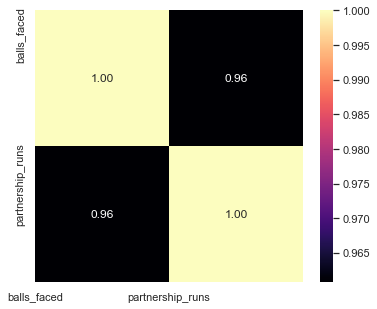

In [459]:
corr = linear_test.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(6, 5))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

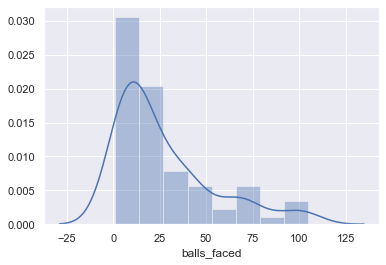

In [460]:
import seaborn as sns
sns.distplot(linear_test['balls_faced'])

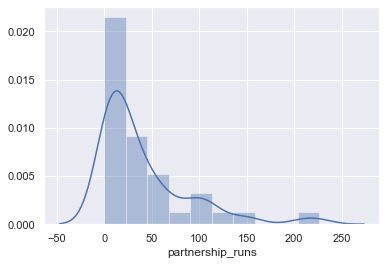

In [461]:
sns.distplot(linear_test['partnership_runs'])

Fitting a linear regression model

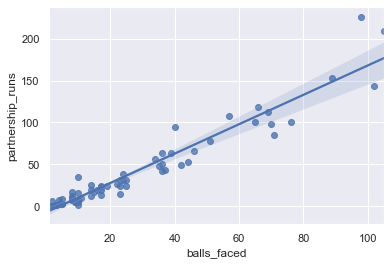

In [462]:
import statsmodels.formula.api as smf
model = smf.ols("partnership_runs~balls_faced",data = linear_test).fit()
sns.regplot(x="balls_faced", y="partnership_runs", data=linear_test); 

In [463]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9230136702550612, 0.9218472107134712)

In [503]:
# prediction for new values

p_runs = pd.Series([6,9,12,18,24,27,30,36,42,48])

data_pred = pd.DataFrame(p_runs,columns=['balls_faced'])
data_pred["Expected_Partnership_Runs"] = model.predict(data_pred)
data_pred

,balls_faced,Expected_Partnership_Runs
0,6,3.329856
1,9,8.584127
2,12,13.838397
3,18,24.346938
4,24,34.855479
5,27,40.109750
6,30,45.364020
7,36,55.872561
8,42,66.381103
9,48,76.889644


## As we have seen in previous performance stats of both the players, Average number of balls faced by both are (14.50 and 13.50) around 28 , and mean of balls faced is 27
Hence, lets predict the number of runs scored when balls faced would be around 27 -28

In [465]:
# prediction for probable number of balls faced

p_runs = pd.Series([26,27,28])

score_VA = pd.DataFrame(p_runs,columns=['balls_faced'])
score_VA["Expected_Partnership_Runs"] = model.predict(score_VA)
score_VA

,balls_faced,Expected_Partnership_Runs
0,26,38.358326
1,27,40.109750
2,28,41.861173


### According to linear Regression the Partnership Scores of Virat Kohli and AB de Villiers would be more than 40

###############################################################################################################################
# Who will win?
###############################################################################################################################

Predicted Playing 11Royal Challengers Bangalore
Devdutt Padikkal, Aaron Finch, Virat Kohli (C), AB de Villiers (WK), Shivam Dube, Washington Sundar, Chris Morris, Isuru Udana, Navdeep Saini, Yuzvendra Chahal and Mohammad Siraj


Kings XI Punjab
KL Rahul (C&WK), Chris Gayle, Mayank Agarwal, Nicholas Pooran, Glenn Maxwell, Mandeep Singh, Krishnappa Gowtham, Ravi Bishnoi, Mohammed Shami, Arshdeep Singh and Sheldon Cottrell/Chris Jordan

In [466]:
IPL_data = pd.merge(deliveries, matches[['id','season', 'team1', 'team2', 'toss_winner', 'toss_decision','winner','result','win_by_runs','win_by_wickets', 'venue' ]], 
                    left_on='match_id', right_on='id')
#IPL_data.bowler.unique()

## Batting team = RCB  and Bowling team = KXIP

In [467]:
#kohli_AbD
#bat :RCB, field: KXIP
RCB_batsmen = ['AJ Finch', 'V Kohli', 'AB de Villiers', 'S Dube','CH Morris','Washington Sundar']
RCB_bowler = ['CH Morris', 'YS Chahal', 'N Saini', 'Washington Sundar','Mohammed Siraj']
# Udana new player: Bowler ER:9.72

KXIP_bowler = ['Mohammed Shami', 'A Singh', 'CJ Jordan', 'M Ur Rahman']
KXIP_batsmen = ['KL Rahul', 'CH Gayle', 'MA Agarwal', 'N Pooran','Mandeep Singh', 'GJ Maxwell']
# D padikkal new player(RCB batsmen): SR: 126.56, balls faced :192, Runs : 243, matches:7
# R bishnoi: New (KXIP bowler) : ER: 7.85

In [468]:
IPL_dataRK = IPL_data[(IPL_data.batsman.isin(RCB_batsmen)) & (IPL_data.bowler.isin(KXIP_bowler))]
RK = IPL_dataRK.groupby(['match_id','batsman', 'bowler'])['batsman_runs', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'extra_runs'].sum().reset_index()
RK_ = IPL_dataRK.groupby(['match_id','batsman', 'bowler'])['ball'].count().reset_index()
RK_data = pd.merge(RK, RK_ ,how='inner',left_on=['match_id','batsman', 'bowler'],right_on=['match_id','batsman', 'bowler'])

# Importand Stats calculations
RK_stats_1 = RK_data.groupby(['batsman','bowler'])['batsman_runs','wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','extra_runs','ball'].sum().reset_index()
RK_stats_1["batsman_strike_rate"] = ((RK_stats_1.batsman_runs*100)/RK_stats_1.ball)
RK_stats_1["bowler_economy_rate"] = ((RK_stats_1.batsman_runs)/(RK_stats_1.ball))*6
RK_stats_1

,batsman,bowler,batsman_runs,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,ball,batsman_strike_rate,bowler_economy_rate
0,AB de Villiers,A Singh,11,0,0,0,0,0,0,7,157.142857,9.428571
1,AB de Villiers,M Ur Rahman,15,0,0,0,0,0,0,7,214.285714,12.857143
2,AB de Villiers,Mohammed Shami,49,0,1,2,0,0,3,24,204.166667,12.250000
3,AJ Finch,A Singh,0,1,0,0,0,0,1,2,0.000000,0.000000
4,AJ Finch,CJ Jordan,3,2,0,0,0,0,2,7,42.857143,2.571429
5,AJ Finch,Mohammed Shami,21,0,0,1,0,0,1,19,110.526316,6.631579
6,CH Morris,M Ur Rahman,4,0,0,0,0,0,0,4,100.000000,6.000000
7,CH Morris,Mohammed Shami,0,0,0,0,0,0,0,1,0.000000,0.000000
8,V Kohli,A Singh,12,0,0,0,0,0,0,6,200.000000,12.000000
9,V Kohli,M Ur Rahman,2,0,0,0,0,0,0,5,40.000000,2.400000


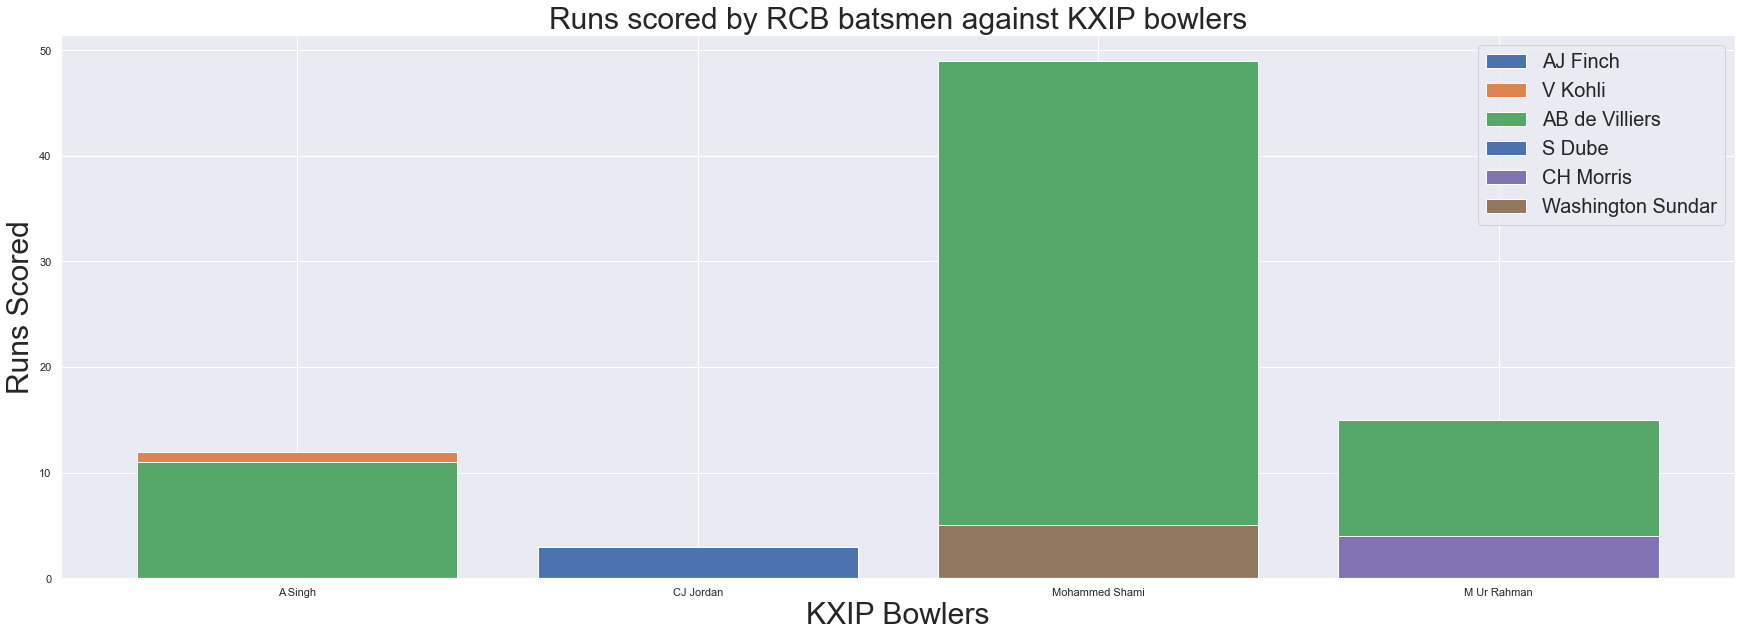

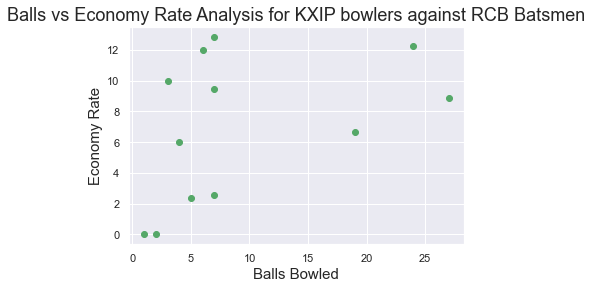

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

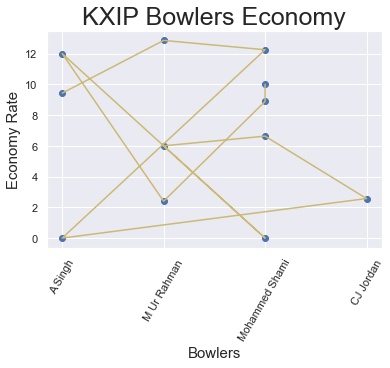

In [469]:
plt.figure(figsize=(30,10))
for name in RCB_batsmen:
    batsman_check_RK1 = RK_stats_1[RK_stats_1.batsman==name]
    batsman_check_RK1.index = np.arange(1, len(batsman_check_RK1) + 1)
    x=batsman_check_RK1.bowler
    y=batsman_check_RK1.batsman_runs
    plt.bar(x,y)
plt.legend(RCB_batsmen,prop={'size':20})
plt.title("Runs scored by RCB batsmen against KXIP bowlers",fontsize= 30)
plt.xlabel("KXIP Bowlers",fontsize=30)
plt.ylabel("Runs Scored",fontsize=30)
plt.show()

# Bowlers Economy rates
plt.scatter(RK_stats_1['ball'],RK_stats_1['bowler_economy_rate'],color='g')
plt.xlabel('Balls Bowled',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Balls vs Economy Rate Analysis for KXIP bowlers against RCB Batsmen',size=18)
plt.show()

plt.plot(RK_stats_1['bowler'],RK_stats_1['bowler_economy_rate'],color='y')
plt.scatter(RK_stats_1['bowler'],RK_stats_1['bowler_economy_rate'],color='b')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('KXIP Bowlers Economy',size=25)
plt.xticks(rotation=60)

## Batting Team : KXIP and Bowling Team : RCB


In [470]:
IPL_dataRK_ = IPL_data[(IPL_data.batsman.isin(KXIP_batsmen)) & (IPL_data.bowler.isin(RCB_bowler))]
RK_ = IPL_dataRK_.groupby(['match_id','batsman', 'bowler'])['batsman_runs', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'extra_runs'].sum().reset_index()
RK_1 = IPL_dataRK_.groupby(['match_id','batsman', 'bowler'])['ball'].count().reset_index()
RK_data_ = pd.merge(RK_, RK_1 ,how='inner',left_on=['match_id','batsman', 'bowler'],right_on=['match_id','batsman', 'bowler'])

# Importand Stats calculations
RK_stats_2 = RK_data_.groupby(['batsman','bowler'])['batsman_runs','wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','extra_runs','ball'].sum().reset_index()
RK_stats_2["batsman_strike_rate"] = ((RK_stats_2.batsman_runs*100)/RK_stats_2.ball)
RK_stats_2["bowler_economy_rate"] = ((RK_stats_2.batsman_runs)/(RK_stats_2.ball))*6
RK_stats_2

,batsman,bowler,batsman_runs,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,ball,batsman_strike_rate,bowler_economy_rate
0,CH Gayle,CH Morris,40,2,0,2,0,0,4,36,111.111111,6.666667
1,CH Gayle,Mohammed Siraj,43,0,0,0,0,0,0,16,268.750000,16.125000
2,CH Gayle,N Saini,18,1,0,0,0,0,1,17,105.882353,6.352941
3,CH Gayle,YS Chahal,14,1,0,2,0,0,3,13,107.692308,6.461538
4,GJ Maxwell,CH Morris,2,0,0,0,0,0,0,3,66.666667,4.000000
5,GJ Maxwell,Mohammed Siraj,3,0,0,0,0,0,0,3,100.000000,6.000000
6,GJ Maxwell,Washington Sundar,0,0,0,0,0,0,0,1,0.000000,0.000000
7,GJ Maxwell,YS Chahal,21,0,8,0,0,0,8,24,87.500000,5.250000
8,KL Rahul,CH Morris,28,0,0,0,0,0,0,12,233.333333,14.000000
9,KL Rahul,N Saini,13,0,0,0,0,0,0,11,118.181818,7.090909


In [497]:
print("RCB :",RK_stats_1.batsman_strike_rate.mean(), RK_stats_2.bowler_economy_rate.mean())

RCB : 115.3161259630558 7.531724655320912


In [496]:
print("Punjab :",RK_stats_2.batsman_strike_rate.mean(), RK_stats_1.bowler_economy_rate.mean())

Punjab : 125.52874425534854 6.918967557783347


## Punjab might win today according to basic analysis done

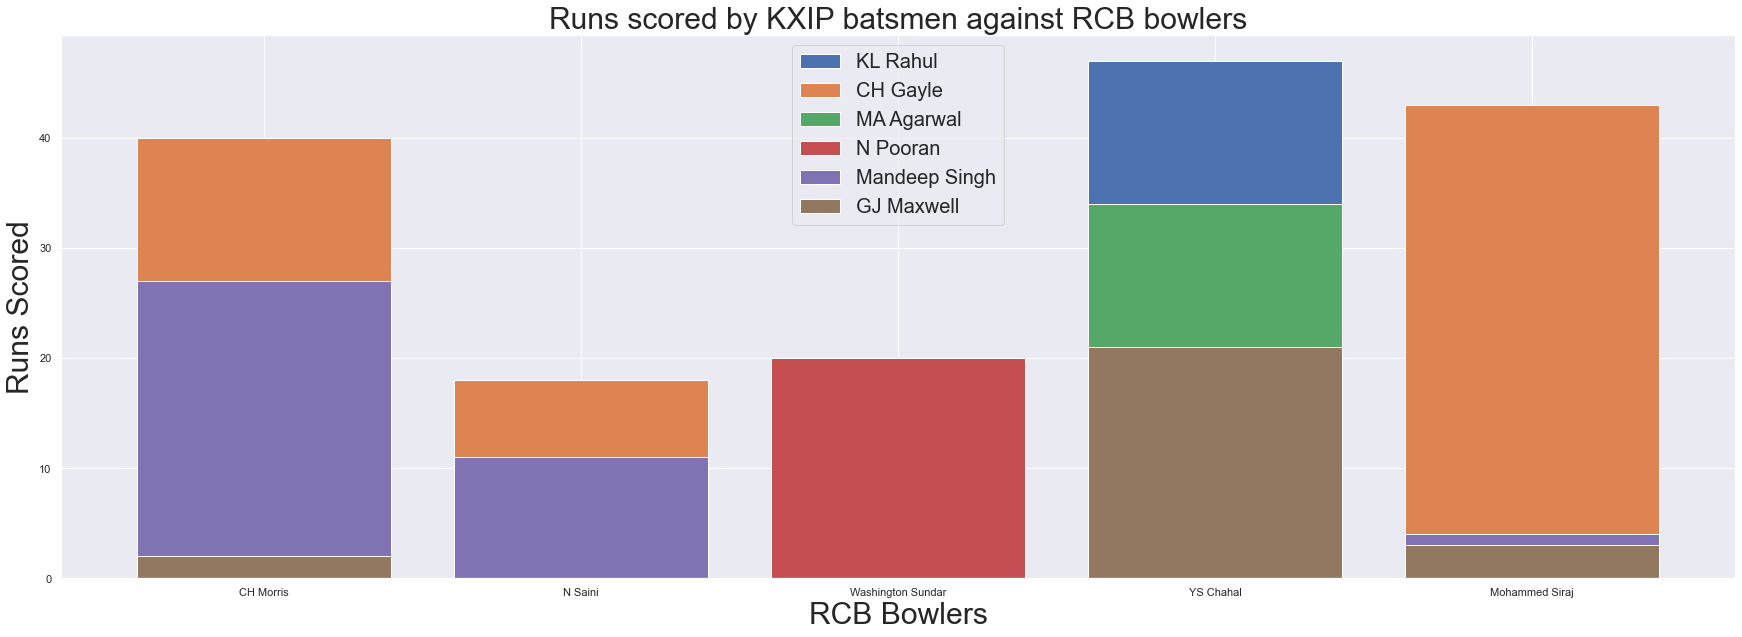

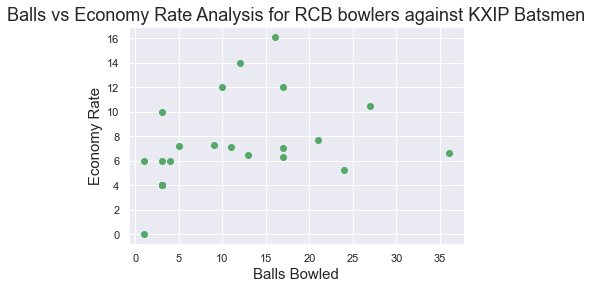

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

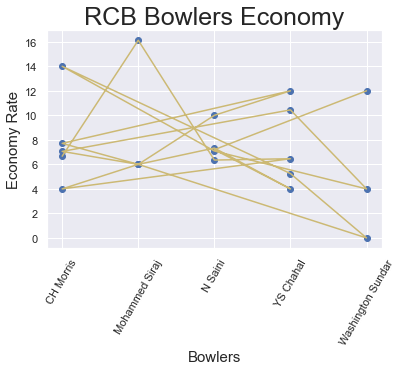

In [471]:
plt.figure(figsize=(30,10))
for name in KXIP_batsmen:
    batsman_check_RK2 = RK_stats_2[RK_stats_2.batsman==name]
    batsman_check_RK2.index = np.arange(1, len(batsman_check_RK2) + 1)
    x=batsman_check_RK2.bowler
    y=batsman_check_RK2.batsman_runs
    plt.bar(x,y)
plt.legend(KXIP_batsmen,prop={'size':20})
plt.title("Runs scored by KXIP batsmen against RCB bowlers",fontsize= 30)
plt.xlabel("RCB Bowlers",fontsize=30)
plt.ylabel("Runs Scored",fontsize=30)
plt.show()

# Bowlers Economy rates
plt.scatter(RK_stats_2['ball'],RK_stats_2['bowler_economy_rate'],color='g')
plt.xlabel('Balls Bowled',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Balls vs Economy Rate Analysis for RCB bowlers against KXIP Batsmen',size=18)
plt.show()

plt.plot(RK_stats_2['bowler'],RK_stats_2['bowler_economy_rate'],color='y')
plt.scatter(RK_stats_2['bowler'],RK_stats_2['bowler_economy_rate'],color='b')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('RCB Bowlers Economy',size=25)
plt.xticks(rotation=60)

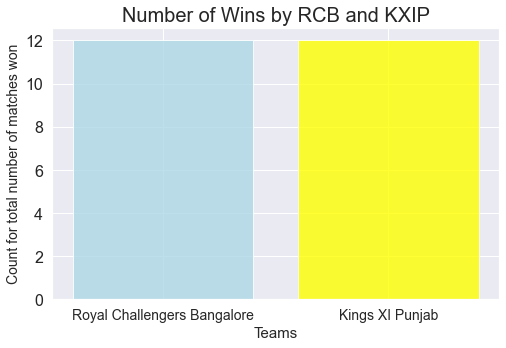

In [472]:
## Past record of both the teams
matches_RK = matches[((matches.team1 == "Royal Challengers Bangalore") & (matches.team2 == "Kings XI Punjab")) | ((matches.team2 == "Royal Challengers Bangalore") & (matches.team1 == "Kings XI Punjab"))]
win_SC = pd.DataFrame(matches_RK['winner'].value_counts())
win_SC['Team_name'] = win_SC.index
win_SC

color_ = ['LightBlue', 'Yellow']
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(8,5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.bar(win_SC['Team_name'], win_SC['winner'], color=color_, alpha=0.8)

    
plt.title('Number of Wins by RCB and KXIP',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Count for total number of matches won',fontsize=14)
plt.show()

In [498]:
print("RCB :",RK_stats_1.batsman_strike_rate.mean(), RK_stats_2.bowler_economy_rate.mean())

print("Punjab :",RK_stats_2.batsman_strike_rate.mean(), RK_stats_1.bowler_economy_rate.mean())



RCB : 115.3161259630558 7.531724655320912
Punjab : 125.52874425534854 6.918967557783347


## Punjab might win today according to basic analysis done

In [499]:
# Multiple Regression Analysis TODO

###############################################################################################################################
# How many No balls will be bowled
###############################################################################################################################

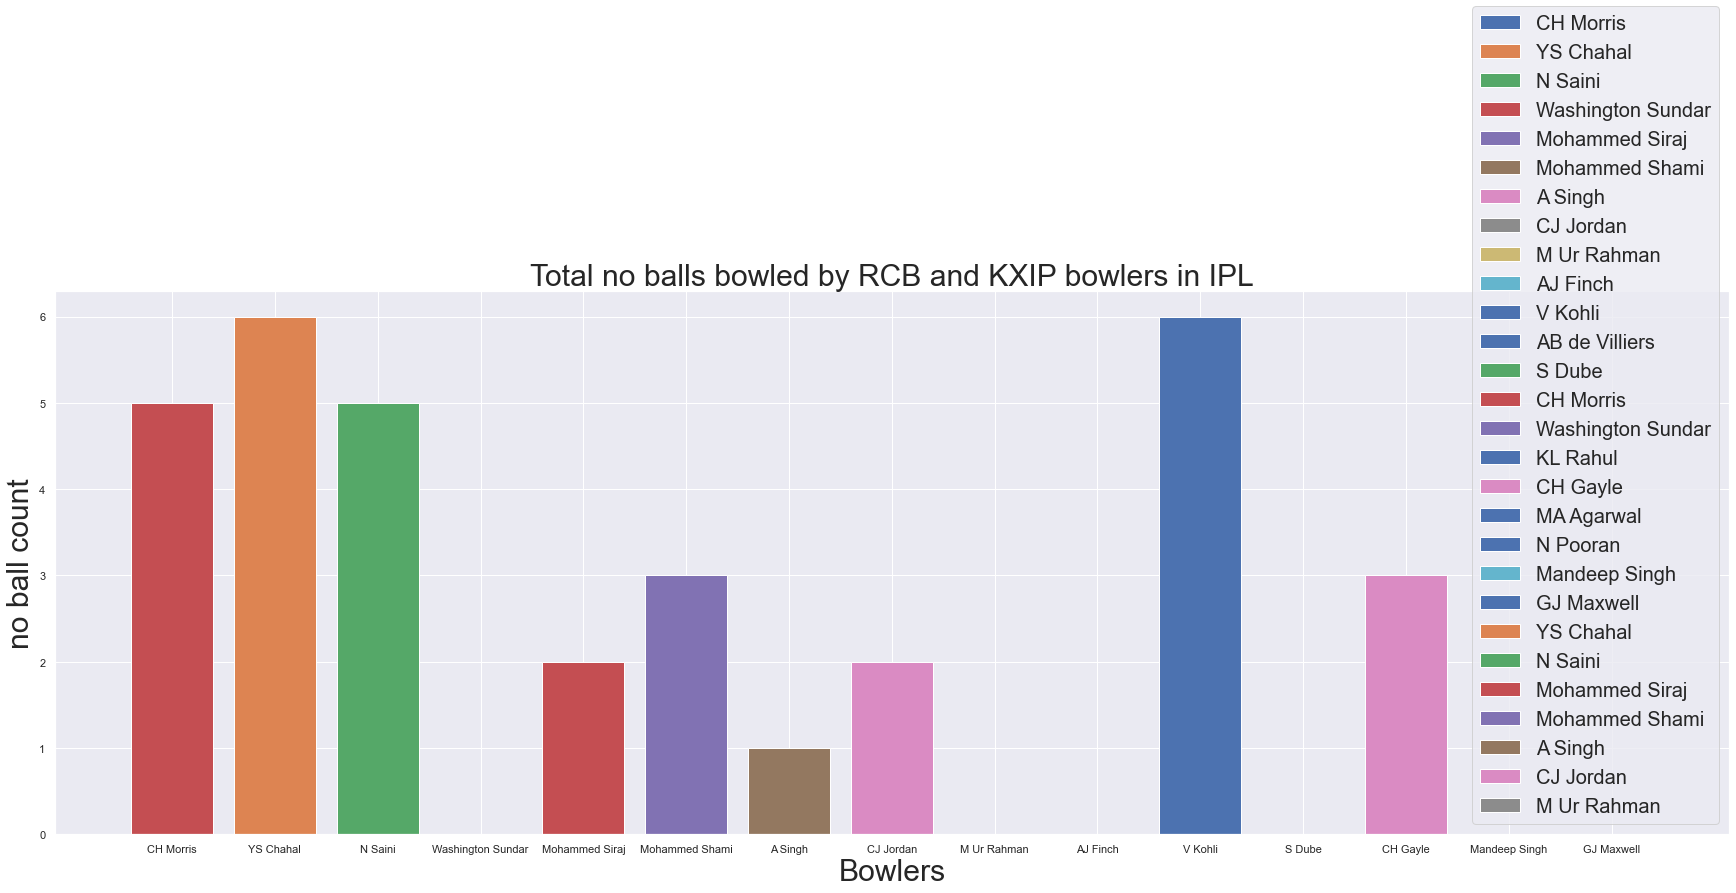

In [474]:
# Players of both the teams
bowler_all = ['CH Morris', 'YS Chahal', 'N Saini', 'Washington Sundar','Mohammed Siraj', 'Mohammed Shami', 'A Singh', 'CJ Jordan', 
              'M Ur Rahman','AJ Finch', 'V Kohli', 'AB de Villiers', 'S Dube','CH Morris','Washington Sundar', 'KL Rahul', 'CH Gayle', 
               'MA Agarwal', 'N Pooran','Mandeep Singh', 'GJ Maxwell', 'YS Chahal', 'N Saini',
               'Mohammed Siraj', 'Mohammed Shami', 'A Singh', 'CJ Jordan', 'M Ur Rahman']
bowler_all_RK = IPL_data[IPL_data.bowler.isin(bowler_all)]
bowler_all_RK_nb = bowler_all_RK.groupby(['match_id', 'bowler'])['noball_runs'].sum().reset_index(name = 'no_balls')

# bowler wise no balls in IPL so far (only RCB and KXIP)
bowler_all_RK_nb_ = bowler_all_RK_nb.groupby(['bowler'])['no_balls'].sum().reset_index()

plt.figure(figsize=(30,10))
for name in bowler_all:
    bowler_check3 = bowler_all_RK_nb_[bowler_all_RK_nb_.bowler==name]
    bowler_check3.index = np.arange(1, len(bowler_check3) + 1)
    x=bowler_check3.bowler
    y=bowler_check3.no_balls
    plt.bar(x,y)

plt.legend(bowler_all,prop={'size':20})
plt.title("Total no balls bowled by RCB and KXIP bowlers in IPL",fontsize=30)
plt.xlabel("Bowlers",fontsize=30)
plt.ylabel("no ball count",fontsize=30)
plt.show()

In [475]:
# Matchwise no balls bowled by bowlers
nb_matchwise = bowler_all_RK_nb.groupby(['match_id'])['no_balls'].sum().reset_index()
nb_matchwise['no_balls'].describe()

count    292.000000
mean       0.113014
std        0.385611
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_balls, dtype: float64

### Average number of no ball bowled in a match by RCB and KXIP player is almost 0 (0.11)<br>Hence, in todays match no balls bowled will be 0

###############################################################################################################################
# How many 6s will be hit in the match
###############################################################################################################################

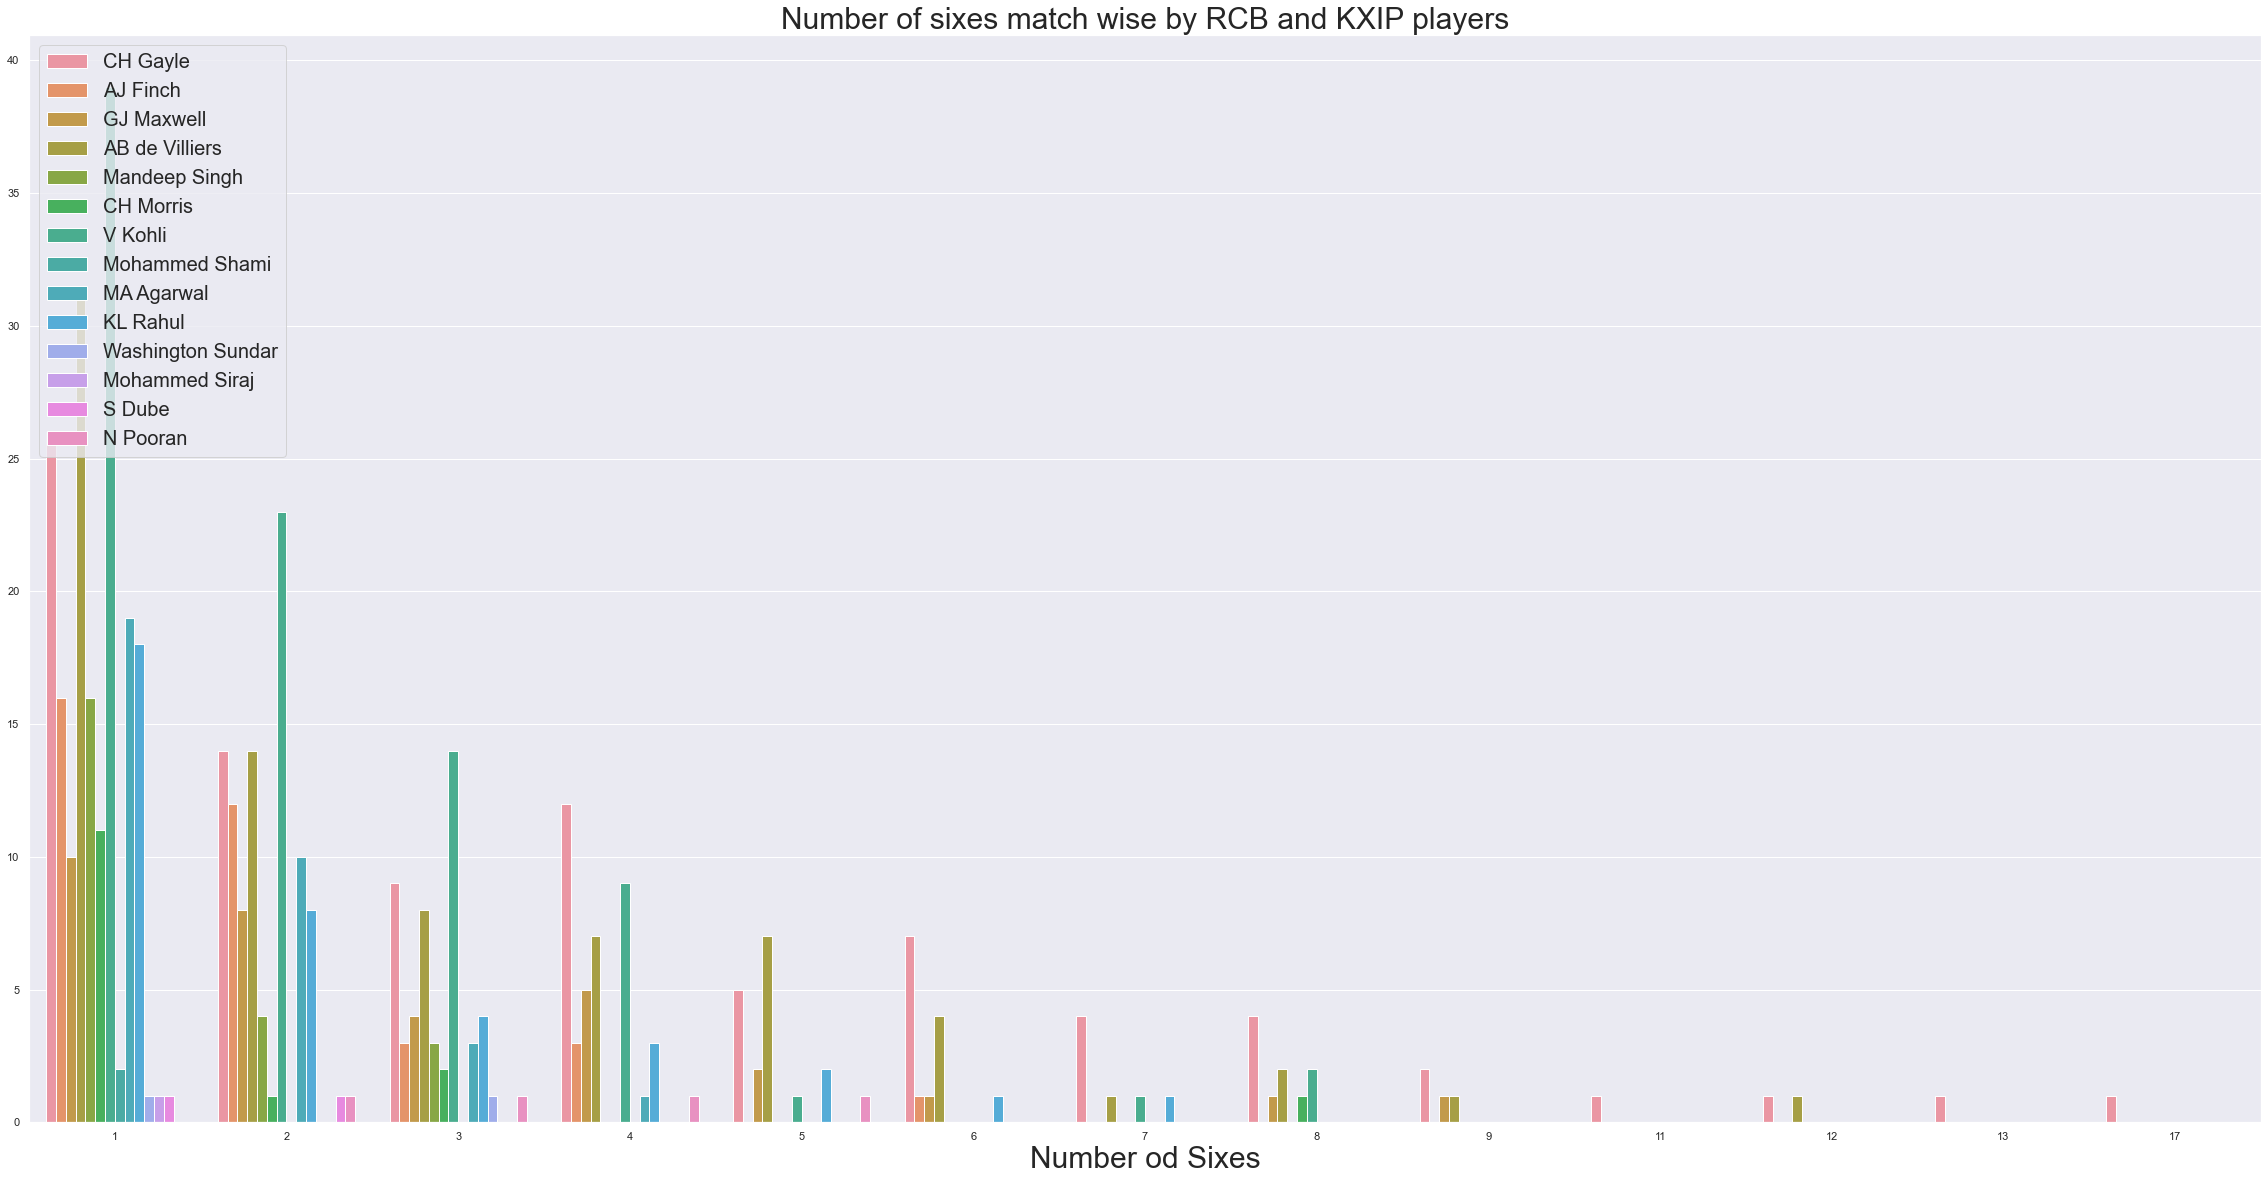

,batsman,number_of_sixes
0,AB de Villiers,214
1,AJ Finch,67
2,CH Gayle,327
3,CH Morris,27
4,GJ Maxwell,91
5,KL Rahul,81
6,MA Agarwal,52
7,Mandeep Singh,33
8,Mohammed Shami,2
9,Mohammed Siraj,1


In [515]:
RK_sixes_count = batsmen_RK_sixes.groupby(['match_id', 'batsman'])['batsman_runs'].count().reset_index(name = 'number_of_sixes')
#sixes_tabel = pd.pivot_table(RK_sixes_count, values='number_of_sixes', index=['match_id'],columns='batsman')

plt.figure(figsize=(40,20))
sns.countplot(x = "number_of_sixes", hue = "batsman",data = RK_sixes_count)
plt.legend(prop={'size':20})
plt.title("Number of sixes match wise by RCB and KXIP players",fontsize=30)
plt.xlabel("Number od Sixes",fontsize=30)
plt.ylabel("",fontsize=30)
plt.show()


# Number od Sixes matchwise 
m_sixes = RK_sixes_count.groupby(['match_id'])['number_of_sixes'].sum().reset_index()
m_sixes
m_sixes[]
m_sixes_bats = RK_sixes_count.groupby(['batsman'])['number_of_sixes'].sum().reset_index()
m_sixes_bats

In [514]:
CG = RK_sixes_count[(RK_sixes_count.batsman == "CH Gayle")]
KL = RK_sixes_count[(RK_sixes_count.batsman == "KL Rahul")]
print(CG.number_of_sixes.values.mean(), KL.number_of_sixes.values.mean())


3.7586206896551726 2.189189189189189


##  Average number of sixes by players of RCB and KXIP are 3.<br> But, here Venue also plays a very important role.

###############################################################################################################################
# Number of sixes 
###############################################################################################################################

In [478]:
# 6s at the sharjah
IPL_data_sharjah = IPL_data[IPL_data.venue == "Sharjah Cricket Stadium"]
IPL_data_sharjah_six = IPL_data_sharjah[IPL_data_sharjah.batsman_runs == 6]
sharjah_six = IPL_data_sharjah_six.groupby(['match_id'])['batsman_runs'].count().reset_index(name = "number_of_sixes")
sharjah_six

,match_id,number_of_sixes
0,459,13
1,464,22
2,466,17
3,468,7
4,473,5
5,474,12


In [502]:
sharjah_six.mean()

match_id           467.333333
number_of_sixes     12.666667
dtype: float64

## Venue wise number of sixes hit are more than 12 (maximum number of times)
## hence, sixes hit will be more than 12

###############################################################################################################################
# Wicket loss by KXIP
###############################################################################################################################

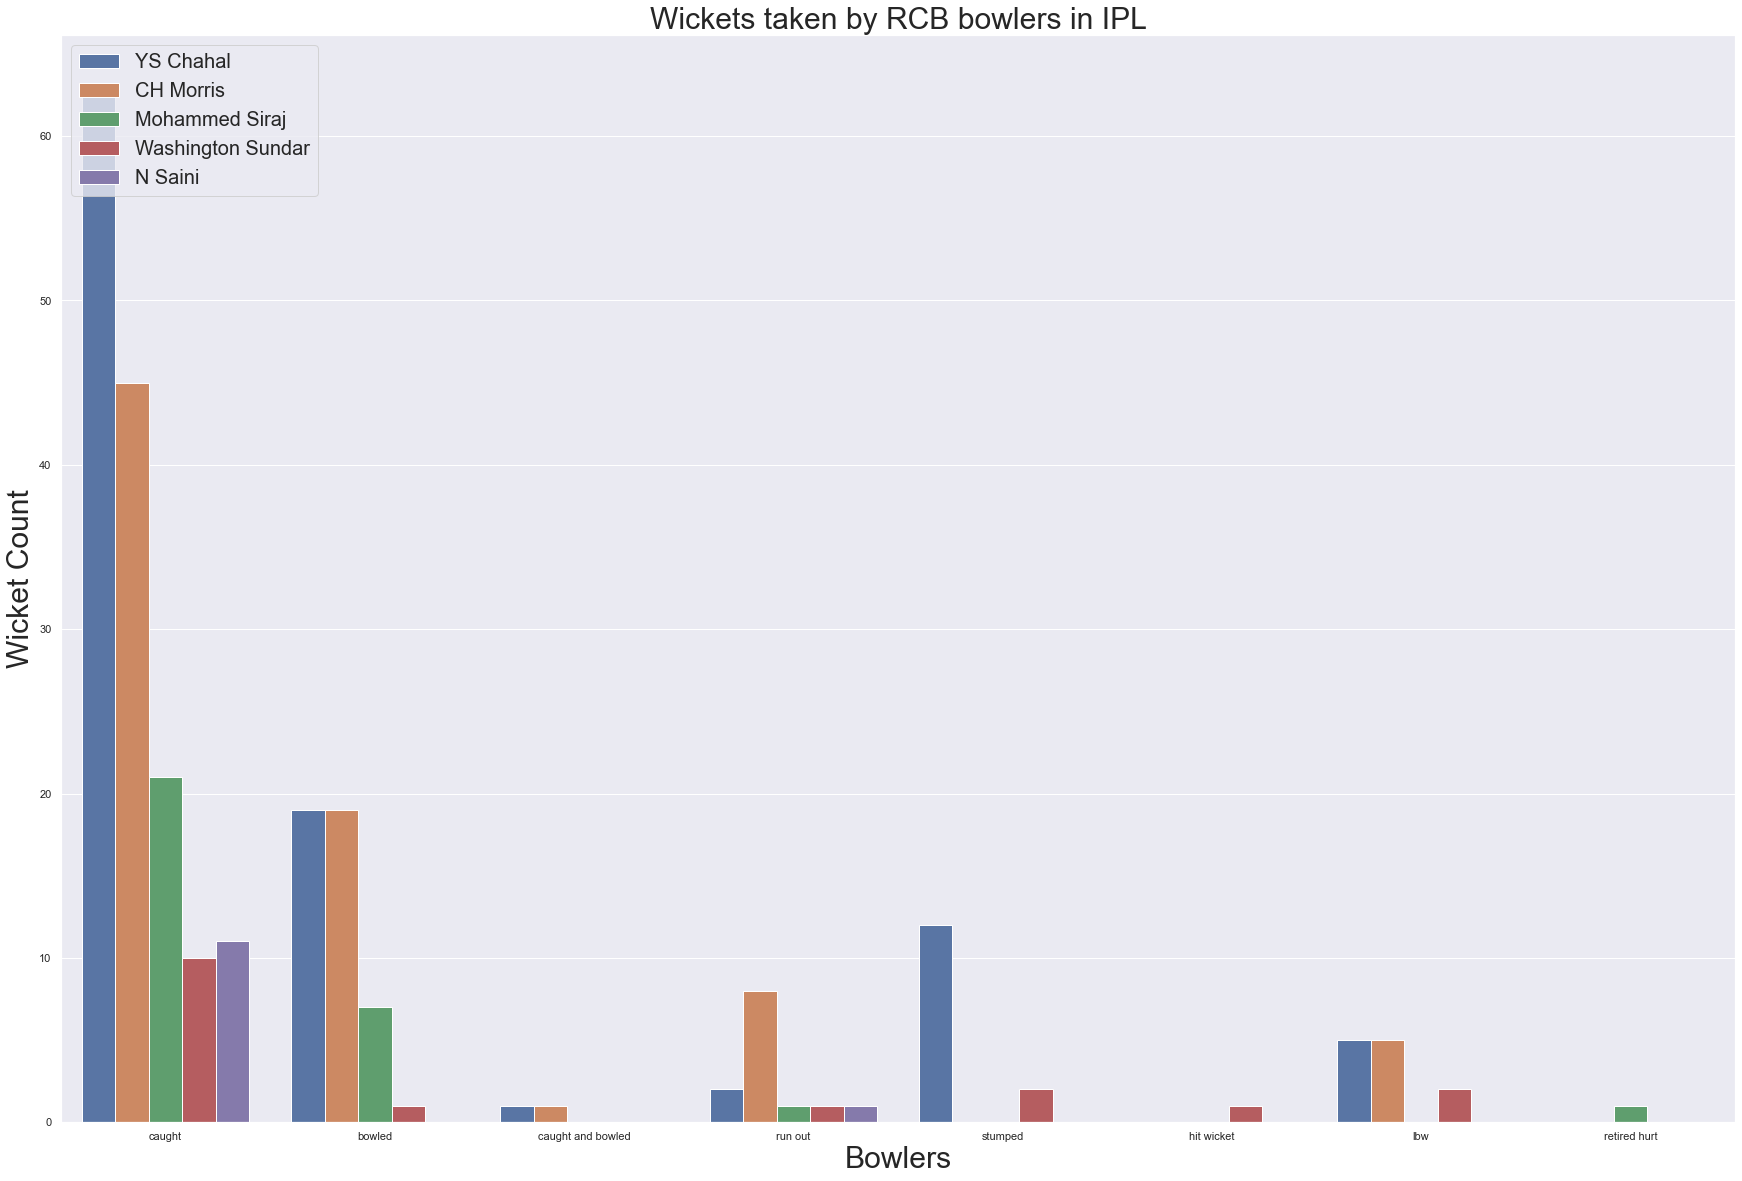

,match_id,bowler,no_of_wickets
0,1,YS Chahal,1
1,5,CH Morris,3
2,5,YS Chahal,1
3,8,YS Chahal,1
4,9,CH Morris,1
...,...,...,...
198,11340,YS Chahal,1
199,11341,CH Morris,1
200,11345,N Saini,2
201,11345,Washington Sundar,3


In [479]:
bowler_RCB_wickets = IPL_data[IPL_data.bowler.isin(RCB_bowler)]
#bowler_RCB_wickets_ = IPL_data[IPL_data.bowler.isin(RCB_bowler)]

plt.figure(figsize=(30,20))
sns.countplot(x = 'dismissal_kind', hue ='bowler', data = bowler_RCB_wickets)
plt.legend(prop={'size':20})
plt.title("Wickets taken by RCB bowlers in IPL",fontsize=30)
plt.xlabel("Bowlers",fontsize=30)
plt.ylabel("Wicket Count",fontsize=30)
plt.show()

# Matchwise wickets
bowler_RCB_wickets_ = bowler_RCB_wickets.groupby(['match_id','bowler'])['dismissal_kind'].count().reset_index(name = "no_of_wickets")
bowler_RCB_wickets_

In [480]:
RCB_wickets_matchwise["match_id"]= RCB_wickets_matchwise["match_id"].astype(str)

In [481]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(bowler_RCB_wickets_, x='bowler', y='no_of_wickets',
             hover_data=['no_of_wickets'], color='match_id',title='Wickets taken By RCB Bowlers in IPL')
fig.show()


In [482]:
# Number of wicket taken per match by RCB Bowlers
RCB_wickets_matchwise = bowler_RCB_wickets_.groupby(['match_id'])['no_of_wickets'].sum().reset_index()
import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(RCB_wickets_matchwise, x='no_of_wickets', y='match_id',
             hover_data=['no_of_wickets'], color='match_id',title='Wickets taken By RCB Bowlers in IPL')

fig.show()

In [486]:
# Average Wickets taken by RCB bowlers
RCB_wickets_matchwise["no_of_wickets"].describe()

count    149.000000
mean       1.604027
std        1.319392
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_of_wickets, dtype: float64

In [485]:
# Wickets taken by RCB Bowlers when Batting team is KXIP

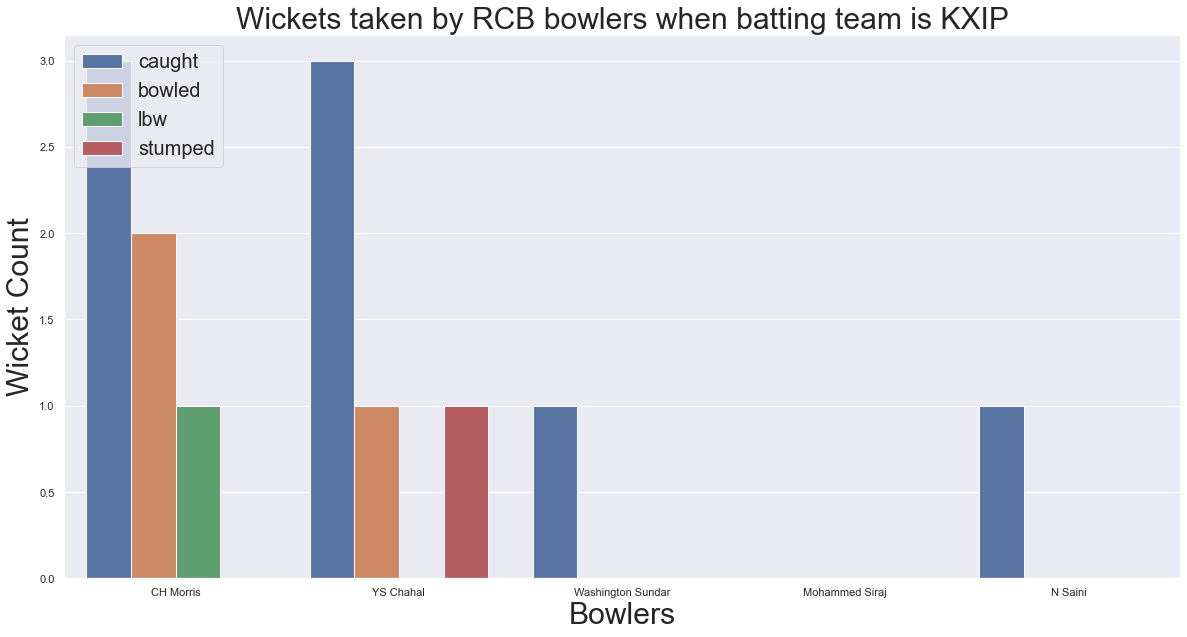

In [487]:
KXIP_wickets = IPL_data[(IPL_data.bowler.isin(RCB_bowler)) & (IPL_data.batsman.isin(KXIP_batsmen))]
plt.figure(figsize=(20,10))
sns.countplot(hue= 'dismissal_kind', x ='bowler', data = KXIP_wickets)
plt.legend(prop={'size':20})
plt.title("Wickets taken by RCB bowlers when batting team is KXIP",fontsize=30)
plt.xlabel("Bowlers",fontsize=30)
plt.ylabel("Wicket Count",fontsize=30)
plt.show()

# Matchwise wickets
KXIP_wickets_ = KXIP_wickets.groupby(['match_id','bowler'])['dismissal_kind'].count().reset_index(name = "no_of_wickets")
#KXIP_wickets_

## By looking at above plot we can say that everu player is capable of  taking wickets in the range of 1- 3, so if we take average of each players wickets and add them , then we could say possible number of wickets KXIP would lose will be 6-8